In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [35]:
df = pd.read_csv('data/all_data.csv')
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
df_sample = pd.read_csv('data/sample_submission.csv')
df_test_private = pd.read_csv('data/test_private_expanded.csv')
df_test_public = pd.read_csv('data/test_public_expanded.csv')
df_tox_annot = pd.read_csv('data/toxicity_individual_annotations.csv')
df_ident_annot = pd.read_csv('data/identity_individual_annotations.csv')

In [30]:
n_rows_all = df.shape[0]
n_rows_train = df_train.shape[0]

In [2]:
df.head()

,id,comment_text,split,created_date,publication_id,parent_id,article_id,rating,funny,wow,...,white,asian,latino,other_race_or_ethnicity,physical_disability,intellectual_or_learning_disability,psychiatric_or_mental_illness,other_disability,identity_annotator_count,toxicity_annotator_count
0,1083994,He got his money... now he lies in wait till a...,train,2017-03-06 15:21:53.675241+00,21,NaN,317120,approved,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,67
1,650904,Mad dog will surely put the liberals in mental...,train,2016-12-02 16:44:21.329535+00,21,NaN,154086,approved,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,76
2,5902188,And Trump continues his lifelong cowardice by ...,train,2017-09-05 19:05:32.341360+00,55,NaN,374342,approved,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,63
3,7084460,"""while arresting a man for resisting arrest"".\...",test,2016-11-01 16:53:33.561631+00,13,NaN,149218,approved,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,76
4,5410943,Tucker and Paul are both total bad ass mofo's.,train,2017-06-14 05:08:21.997315+00,21,NaN,344096,approved,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,80


In [4]:
df.columns

Index(['id', 'comment_text', 'split', 'created_date', 'publication_id',
       'parent_id', 'article_id', 'rating', 'funny', 'wow', 'sad', 'likes',
       'disagree', 'toxicity', 'severe_toxicity', 'obscene', 'sexual_explicit',
       'identity_attack', 'insult', 'threat', 'male', 'female', 'transgender',
       'other_gender', 'heterosexual', 'homosexual_gay_or_lesbian', 'bisexual',
       'other_sexual_orientation', 'christian', 'jewish', 'muslim', 'hindu',
       'buddhist', 'atheist', 'other_religion', 'black', 'white', 'asian',
       'latino', 'other_race_or_ethnicity', 'physical_disability',
       'intellectual_or_learning_disability', 'psychiatric_or_mental_illness',
       'other_disability', 'identity_annotator_count',
       'toxicity_annotator_count'],
      dtype='object')

In [36]:

main_columns = ['id', 'comment_text', 'split','toxicity']

subtype_columns = ['severe_toxicity', 'obscene', 'insult', 'threat','identity_attack','sexual_explicit']

identity_columns = ['male', 'female', 'transgender',
'other_gender', 'heterosexual', 'homosexual_gay_or_lesbian', 'bisexual',
'other_sexual_orientation', 'christian', 'jewish', 'muslim', 'hindu',
'buddhist', 'atheist', 'other_religion', 'black', 'white', 'asian',
'latino', 'other_race_or_ethnicity', 'physical_disability',
'intellectual_or_learning_disability', 'psychiatric_or_mental_illness',
'other_disability']

metadata_columns = ['created_date', 'publication_id',
'parent_id', 'article_id', 'rating', 'funny', 'wow', 'sad', 'likes',
'disagree', 'identity_annotator_count',
'toxicity_annotator_count']


In [12]:
# target value is the probability of being toxic for the test data, given by fraction of human raters who believed that a comment is toxic
# For evaluation, we can say that toxicity >= 0.5 will be toxic comments


0.0

In [34]:
# ? 

# check df_train
df_all_train = df[df['split'] == 'train']
print(f'Number of rows of training when extracting from all_data is: {df_all_train.shape[0]}')
print(f'Number of rows of training set is: {n_rows_train}')


Number of rows of training when extracting from all_data is: 1804875
Number of rows of training set is: 1804874


In [40]:
df_test.head()

,id,comment_text
0,7097320,[ Integrity means that you pay your debts.]\n\...
1,7097321,This is malfeasance by the Administrator and t...
2,7097322,@Rmiller101 - Spoken like a true elitist. But ...
3,7097323,"Paul: Thank you for your kind words. I do, in..."
4,7097324,Sorry you missed high school. Eisenhower sent ...


In [44]:
df_sample.head()

,id,prediction
0,7097320,0.0
1,7097321,0.0
2,7097322,0.0
3,7097323,0.0
4,7097324,0.0


In [68]:
df_test_private.head()
df_test_private.columns


Index(['id', 'comment_text', 'created_date', 'publication_id', 'parent_id',
       'article_id', 'rating', 'funny', 'wow', 'sad', 'likes', 'disagree',
       'toxicity', 'severe_toxicity', 'obscene', 'sexual_explicit',
       'identity_attack', 'insult', 'threat', 'identity_annotator_count',
       'toxicity_annotator_count', 'male', 'female', 'transgender',
       'other_gender', 'heterosexual', 'homosexual_gay_or_lesbian', 'bisexual',
       'other_sexual_orientation', 'christian', 'jewish', 'muslim', 'hindu',
       'buddhist', 'atheist', 'other_religion', 'black', 'white', 'asian',
       'latino', 'other_race_or_ethnicity', 'physical_disability',
       'intellectual_or_learning_disability', 'psychiatric_or_mental_illness',
       'other_disability'],
      dtype='object')

In [66]:
df_test_public.head()


,id,comment_text,created_date,publication_id,parent_id,article_id,rating,funny,wow,sad,...,other_religion,black,white,asian,latino,other_race_or_ethnicity,physical_disability,intellectual_or_learning_disability,psychiatric_or_mental_illness,other_disability
0,7000000,Jeff Sessions is another one of Trump's Orwell...,2017-01-26 07:37:38.422417+00,13,NaN,164149,approved,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7000001,I actually inspected the infrastructure on Gra...,2016-12-03 20:38:21.204649+00,54,655260.0,154341,approved,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7000002,No it won't . That's just wishful thinking on ...,2017-05-05 18:07:58.560078+00,21,5219683.0,332005,approved,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7000003,Instead of wringing our hands and nibbling the...,2017-02-09 14:46:30.189044+00,13,NaN,167110,approved,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7000004,how many of you commenters have garbage piled ...,2016-10-15 01:18:40.521923+00,21,NaN,148484,approved,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
df_ident_annot.head()

,id,worker,disability,gender,race_or_ethnicity,religion,sexual_orientation
0,59856,211,none,none,none,none,none
1,59856,683,intellectual_or_learning none,none,none,none,none
2,59856,8899,none,none,none,none,none
3,59856,67,none,none,none,none,none
4,239579,8900,none,none,none,none,none


In [48]:
df_tox_annot.head()

,id,worker,toxic,severe_toxic,identity_attack,insult,obscene,sexual_explicit,threat
0,59859,0,1,0,0,1,1,0,0
1,59859,1,1,0,0,0,1,0,0
2,59859,2,1,0,0,1,1,0,0
3,59859,3,1,1,0,0,1,0,0
4,59859,4,1,0,0,0,1,0,0


In [50]:
# I think we should work mainly with df_train dataset
df_train.head()

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47


In [51]:
df_train.columns

Index(['id', 'target', 'comment_text', 'severe_toxicity', 'obscene',
       'identity_attack', 'insult', 'threat', 'asian', 'atheist', 'bisexual',
       'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu',
       'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability',
       'jewish', 'latino', 'male', 'muslim', 'other_disability',
       'other_gender', 'other_race_or_ethnicity', 'other_religion',
       'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender', 'white', 'created_date',
       'publication_id', 'parent_id', 'article_id', 'rating', 'funny', 'wow',
       'sad', 'likes', 'disagree', 'sexual_explicit',
       'identity_annotator_count', 'toxicity_annotator_count'],
      dtype='object')

In [52]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1804874 entries, 0 to 1804873
Data columns (total 45 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   id                                   int64  
 1   target                               float64
 2   comment_text                         object 
 3   severe_toxicity                      float64
 4   obscene                              float64
 5   identity_attack                      float64
 6   insult                               float64
 7   threat                               float64
 8   asian                                float64
 9   atheist                              float64
 10  bisexual                             float64
 11  black                                float64
 12  buddhist                             float64
 13  christian                            float64
 14  female                               float64
 15  heterosexual                    

In [53]:
df.describe()

,id,publication_id,parent_id,article_id,funny,wow,sad,likes,disagree,toxicity,...,white,asian,latino,other_race_or_ethnicity,physical_disability,intellectual_or_learning_disability,psychiatric_or_mental_illness,other_disability,identity_annotator_count,toxicity_annotator_count
count,1.999516e+06,1.999516e+06,1.134709e+06,1.999516e+06,1.999516e+06,1.999516e+06,1.999516e+06,1.999516e+06,1.999516e+06,1.999516e+06,...,448000.000000,448000.000000,448000.000000,448000.000000,448000.000000,448000.000000,448000.000000,448000.000000,1.999516e+06,1.999516e+06
mean,4.065400e+06,4.988997e+01,3.715138e+06,2.810257e+05,2.776687e-01,4.437174e-02,1.089289e-01,2.441188e+00,5.808151e-01,1.029241e-01,...,0.056534,0.011886,0.006151,0.008158,0.001351,0.001117,0.012068,0.001219,1.431667e+00,8.775720e+00
std,2.527563e+06,2.771895e+01,2.451507e+06,1.040778e+05,1.054819e+00,2.458644e-01,4.555570e-01,4.712994e+00,1.854332e+00,1.970386e-01,...,0.215175,0.086906,0.058828,0.042429,0.017461,0.016391,0.089072,0.014114,1.763593e+01,4.331605e+01
min,5.984800e+04,2.000000e+00,6.100600e+04,2.006000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,3.000000e+00
25%,8.565798e+05,2.100000e+01,7.930110e+05,1.600038e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,4.000000e+00
50%,5.340220e+06,5.400000e+01,5.217531e+06,3.319250e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,4.000000e+00
75%,5.955782e+06,5.400000e+01,5.774684e+06,3.662270e+05,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,1.666667e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,6.000000e+00
max,7.194640e+06,1.150000e+02,6.333965e+06,3.995440e+05,1.020000e+02,2.100000e+01,3.100000e+01,3.000000e+02,1.870000e+02,1.000000e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.600000,1.866000e+03,4.936000e+03


In [56]:
df_train['toxic'] = np.where(df_train['target'] >= 0.50, 1, 0)

In [57]:
df_train.head()

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count,toxic
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.0,0,4,0
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.0,0,4,0
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.0,0,4,0
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.0,0,4,0
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,...,rejected,0,0,0,1,0,0.0,4,47,1


In [70]:
#imbalanced data
counts = df_train['toxic'].value_counts()
counts


toxic
0    1660540
1     144334
Name: count, dtype: int64

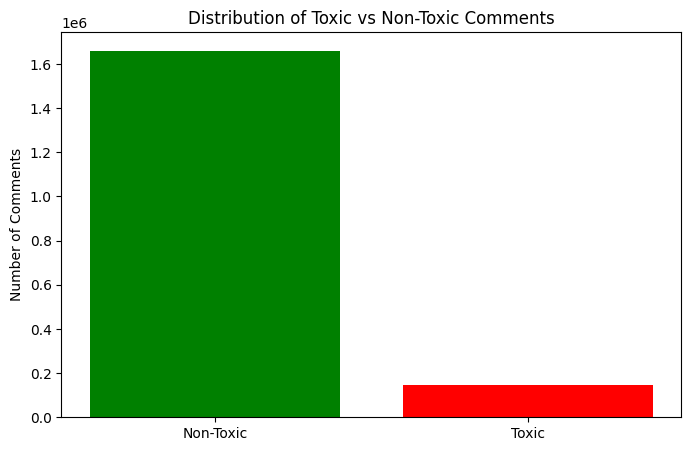

In [75]:
# Plotting
plt.figure(figsize=(8, 5))
plt.bar(counts.index, counts.values, color=['green', 'red'])
plt.xticks(counts.index, ['Non-Toxic', 'Toxic'])
plt.title('Distribution of Toxic vs Non-Toxic Comments')
plt.ylabel('Number of Comments')
plt.show()